Steps - 
1.Import the libraries

2.Get the data and observe it

3.Check missing values, either remove it or fill it.

4.Get summary of data using python function.

5.Explore the data parameter wise

Here we have information of destination(start and stop), time(start and stop), category and purpose of trip, miles covered.


In [150]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# Get the Data 
uber_drives = pd.read_csv('My Uber Drives 2016.csv')
uber_drives.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [152]:
uber_drives.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [153]:
# understand shape and size of data 
print(uber_drives.shape)
print (uber_drives.size)

(1156, 7)
8092


In [154]:
#get more information about data
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [155]:
# See if any value is missing 
uber_drives.isnull().values.any()

True

In [156]:
uber_drives.isnull().values.sum()

507

In [157]:
# Get the initial data with dropping the NA values
uber_drives = uber_drives.dropna()

In [158]:
#get the summary of data
uber_drives.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


Lets explore the data parameter wise - 

1.Destination - (starting and stopping)

2.Time - (hour of the day, day of week, month of year)

3.Categories

4.Purpose 

5.Grouping two parameters to get more insights.


In [159]:
#for similicity lets give uber_drives dataframe give a name df 
df = uber_drives

In [160]:
#1. Destination (start and stop)

# Get the starting destination, unique destination
start_destination = uber_drives['START*'].dropna()
unique_start = set(start_destination)
print (len(unique_start))

# Get the stop destination, unique destination
stop_destination = uber_drives['STOP*'].dropna()
unique_stop = set(stop_destination)
print (len(unique_stop))

131
137


In [161]:
# Here, trying to look at the trips count for start destinations

location_end = []
for i in unique_stop:
    temp = uber_drives[uber_drives['START*'] == i]
    location_end.append(len(temp))

df2 = pd.DataFrame(location_end, index = unique_stop, columns = pd.Index(['Trips']))

df2.sort_values(['Trips'], ascending=False, inplace=True)
df2.head(5)

# We can say that Cary is most poplular starting points for this driver.

,Trips
Cary,161
Unknown Location,55
Morrisville,54
Whitebridge,36
Durham,30


In [162]:
# In the similar way, trying to look at the trips count for stop destinations

location_end = []
for i in unique_stop:
    temp = uber_drives[uber_drives['STOP*'] == i]
    location_end.append(len(temp))

df3 = pd.DataFrame(location_end, index = unique_stop, columns = pd.Index(['Trips']))

df3.sort_values(['Trips'], ascending=False, inplace=True)
df3.head(5)

#We can say the Cary is most popular dropping point also for this driver.

,Trips
Cary,155
Morrisville,60
Unknown Location,56
Whitebridge,37
Durham,30


In [163]:
#Trying to find out most farthest start and stop pair.
#Dropping Unknown Location Value
df = uber_drives
df2 = df[df['START*']!= 'Unknown Location']
df2 = df2[df2['STOP*']!= 'Unknown Location']

df2.groupby(['START*','STOP*']).size().sort_values(ascending=False)

#We can say that Morrisville and Cary are farthest.

START*                     STOP*            
Cary                       Morrisville          52
Morrisville                Cary                 51
Cary                       Cary                 44
                           Durham               30
Durham                     Cary                 29
Kar?chi                    Kar?chi              20
Cary                       Raleigh              17
Lahore                     Lahore               16
Raleigh                    Cary                 15
Cary                       Apex                 11
Apex                       Cary                 10
Westpark Place             Whitebridge           5
Islamabad                  Islamabad             4
Orlando                    Kissimmee             4
Raleigh                    Morrisville           4
Whitebridge                Wayne Ridge           4
                           Waverly Place         4
Edgehill Farms             Whitebridge           4
Whitebridge                Tanglewood

In [164]:
#Trying to find out most popular start and stop pair.
uber_drives
df2.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)

#We can say that in the known locations Morrisville to Cary are most pupular.

START*                STOP*                  
Cary                  Durham                     312.3
Latta                 Jacksonville               310.3
Durham                Cary                       298.4
Cary                  Morrisville                293.7
Raleigh               Cary                       269.5
Morrisville           Cary                       250.6
Cary                  Cary                       233.9
                      Raleigh                    230.4
Jacksonville          Kissimmee                  201.0
Boone                 Cary                       180.2
Jacksonville          Ridgeland                  174.2
Florence              Cary                       159.3
Cary                  Latta                      144.0
Ridgeland             Florence                   144.0
Austin                Katy                       136.0
Winston Salem         Asheville                  133.6
Cary                  Winston Salem              107.0
Asheville          

In [165]:
#2. Time 

# START DATE and END_DATE have string format. Convert it to datetime object

df.loc[:, 'START_DATE*'] = df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
df.loc[:, 'END_DATE*'] = df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    653 non-null datetime64[ns]
END_DATE*      653 non-null datetime64[ns]
CATEGORY*      653 non-null object
START*         653 non-null object
STOP*          653 non-null object
MILES*         653 non-null float64
PURPOSE*       653 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [167]:
#Calculate the time for the rides and convert it to numbers(minutes)
df['DIFF'] = df['END_DATE*'] - df['START_DATE*']
#df.loc[:, 'DIFF'] = df['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [168]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00


In [169]:
df.loc[:, 'DIFF'] = df['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [170]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0


In [171]:
#pd.to_datetime(start_date).month # Get the Day/Month/Year from the Series
#pd.to_datetime(uber_drives['START_DATE*']).dt.month # Get the Day/Month/Year from the DataFrame

Jan = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 1]
Feb = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 2]
Mar = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 3]
Apr = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 4]
May = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 5]
Jun = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 6]
Jul = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 7]
Aug = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 8]
Sep = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 9]
Oct = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 10]
Nov = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 11]
Dec = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 12]

In [172]:
Jan

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,43.0


In [173]:
# We will create the day wise dataframes to get the understanding of daywise spread of trips across every month.
Jan.loc[:,'day'] = pd.to_datetime(Jan['START_DATE*']).dt.day
Feb.loc[:,'day'] = pd.to_datetime(Feb['START_DATE*']).dt.day
Mar.loc[:,'day'] = pd.to_datetime(Mar['START_DATE*']).dt.day
Apr.loc[:,'day'] = pd.to_datetime(Apr['START_DATE*']).dt.day
May.loc[:,'day'] = pd.to_datetime(May['START_DATE*']).dt.day
Jun.loc[:,'day'] = pd.to_datetime(Jun['START_DATE*']).dt.day
Jul.loc[:,'day'] = pd.to_datetime(Jul['START_DATE*']).dt.day
Aug.loc[:,'day'] = pd.to_datetime(Aug['START_DATE*']).dt.day
Sep.loc[:,'day'] = pd.to_datetime(Sep['START_DATE*']).dt.day
Oct.loc[:,'day'] = pd.to_datetime(Oct['START_DATE*']).dt.day
Nov.loc[:,'day'] = pd.to_datetime(Nov['START_DATE*']).dt.day
Dec.loc[:,'day'] = pd.to_datetime(Dec['START_DATE*']).dt.day

# Getting the sum of trips each month, day wise.
Jan_group = Jan.groupby(['day']).agg('sum')
Feb_group = Feb.groupby(['day']).agg('sum')
Mar_group = Mar.groupby(['day']).agg('sum')
Apr_group = Apr.groupby(['day']).agg('sum')
May_group = May.groupby(['day']).agg('sum')
Jun_group = Jun.groupby(['day']).agg('sum')
Jul_group = Jul.groupby(['day']).agg('sum')
Aug_group = Aug.groupby(['day']).agg('sum')
Sep_group = Sep.groupby(['day']).agg('sum')
Oct_group = Oct.groupby(['day']).agg('sum')
Nov_group = Nov.groupby(['day']).agg('sum')
Dec_group = Dec.groupby(['day']).agg('sum')

C:\Users\Mohita_BGL\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mohita_BGL\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [174]:
Jan_group['MILES*'].sum()

500.70000000000005

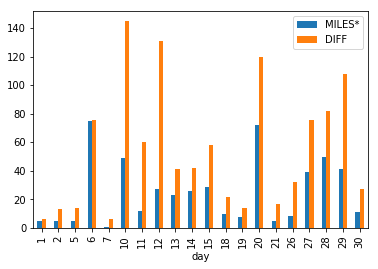

In [175]:
#Plotting the miles and durations of trips for Jan month
Jan_group.plot(kind= 'bar')
plt.show()

In [176]:
Jan_group['MILES*'].sort_values(ascending = False)
#We can say the on 6th Jan the driver has covered the highest value of miles.

day
6     75.1
20    72.4
28    49.4
10    49.3
29    41.6
27    39.5
15    28.8
12    27.2
14    25.8
13    23.0
11    11.6
30    11.4
18     9.5
26     8.1
19     7.6
1      5.1
21     5.0
2      4.8
5      4.7
7      0.8
Name: MILES*, dtype: float64

In [177]:
#Now we creating dataframe the sum of miles covered for each month and plotting it.
miles_day_frame = pd.concat([Jan_group['MILES*'], Feb_group['MILES*'],Mar_group['MILES*'],Apr_group['MILES*'],May_group['MILES*'],Jun_group['MILES*'],Jul_group['MILES*'],Aug_group['MILES*'],Sep_group['MILES*'],Oct_group['MILES*'],
               Nov_group['MILES*'],Dec_group['MILES*']],ignore_index=True, axis=1)
miles_day_frame.columns = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
miles_day_frame.fillna(0,inplace=True)


Jan     500.7
Feb     727.2
Mar    1455.9
Apr    1094.9
May     358.5
Jun     541.0
Jul     488.3
Aug      88.1
Sep       0.0
Oct     496.8
Nov     635.4
Dec     924.4
dtype: float64


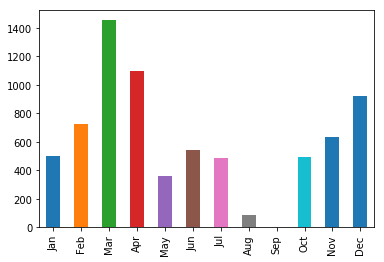

In [178]:
#Sum of miles covered for each month
print(miles_day_frame.sum(axis = 0))
miles_day_frame.sum(axis = 0).plot(kind = 'bar')

#We can say that driver has covered most miles in march month.

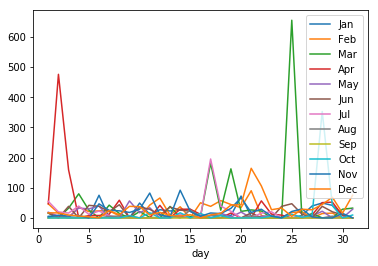

In [179]:
miles_day_frame.plot()   ### do it month wise toptal number of trips.

Text(0.5,1,'Number of trips per hour')

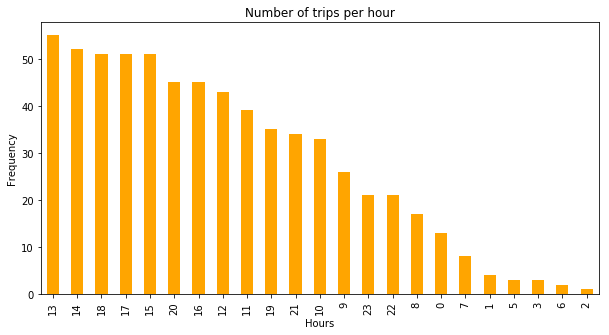

In [180]:
# how many trip made at each clock time and as you see the clock which has the higest number of trips is 1:00 PM
hours = uber_drives['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

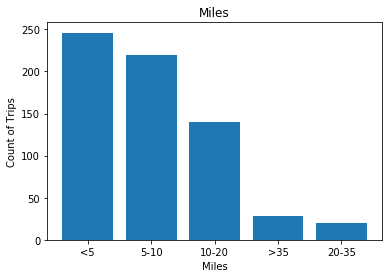

In [181]:
# Miles calculations
# Miles Range (Trying to put the miles covered in different buckets)

range_ = ["<5","5-10","10-20","20-35",">35"]

dict_range = dict()
for x in range_:
    dict_range[x] = 0

for i in uber_drives['MILES*']:
    if i < 5:
        dict_range["<5"] += 1
    elif i < 10:
        dict_range["5-10"] += 1
    elif i < 20:
        dict_range["10-20"] += 1
    elif i < 35:
        dict_range["20-35"] += 1
    else:
        dict_range[">35"] += 1
    
miles = pd.Series(dict_range)
miles.sort_values(inplace=True, ascending=False)
X = plt.bar(range(1,len(miles.index)+1),miles.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Count of Trips")
plt.xticks(range(1,len(miles.index)+1),miles.index)
plt.show()       


In [182]:
# calculate trip speed for each trip
uber_drives['Duration_hours'] = uber_drives['DIFF'] / 60
uber_drives['Speed_KM'] = uber_drives['MILES*'] / uber_drives['Duration_hours']
uber_drives['Speed_KM']

0       51.000000
2       22.153846
3       20.142857
4       57.044776
5       64.500000
6       85.200000
7        8.000000
8       24.900000
9       36.666667
10      15.069767
11      12.857143
12      18.600000
13      14.769231
14      13.714286
15       7.285714
16       8.769231
17       7.125000
18      15.000000
19       7.714286
20       9.600000
21      10.000000
22      15.620690
23      51.692308
24      25.285714
25      36.500000
26      39.000000
27      24.000000
28      31.200000
29      34.666667
30      26.181818
          ...    
1124    10.645161
1125    19.312500
1126    20.800000
1127    15.000000
1128    14.571429
1129    18.857143
1130     9.913043
1131     9.000000
1132    13.411765
1133    30.260870
1134    22.312500
1135    10.500000
1136     9.428571
1137    16.400000
1138    22.875000
1139     7.090909
1140    12.000000
1141    12.300000
1142    14.400000
1144    23.454545
1145     9.333333
1146     6.960000
1147    12.545455
1148    12.000000
1149    12

In [183]:
#4. Purpose
uber_drives.info()
uber_drives['PURPOSE*'].unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 10 columns):
START_DATE*       653 non-null datetime64[ns]
END_DATE*         653 non-null datetime64[ns]
CATEGORY*         653 non-null object
START*            653 non-null object
STOP*             653 non-null object
MILES*            653 non-null float64
PURPOSE*          653 non-null object
DIFF              653 non-null float64
Duration_hours    653 non-null float64
Speed_KM          653 non-null float64
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 56.1+ KB


array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

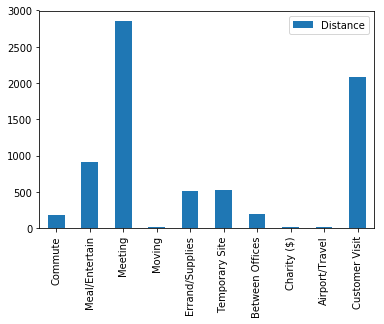

In [184]:
# Proportion of distance spent for each activities
purpose = set(uber_drives['PURPOSE*'])
total_dist = []

for i in purpose:
    temp = uber_drives[uber_drives['PURPOSE*'] == i]
    total_dist.append(sum(temp['MILES*']))

df = pd.DataFrame(total_dist, index = purpose, columns = pd.Index(['Distance']))
df.plot(kind='bar')
plt.show()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64


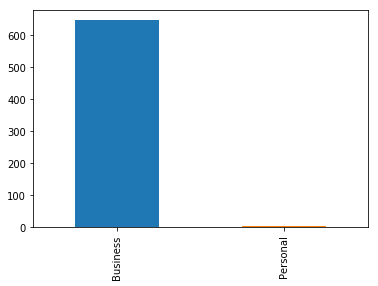

In [185]:
# plot number of trip at each category
x = uber_drives['CATEGORY*'].value_counts()
print(x)
x.plot(kind = 'bar')

Now lets try to answer some questions from this data.

Question1: How many miles was earned per category and purpose ?

Question2: What is percentage of business miles vs personal?

Question3: How much time was spend for drives per category and purpose? 


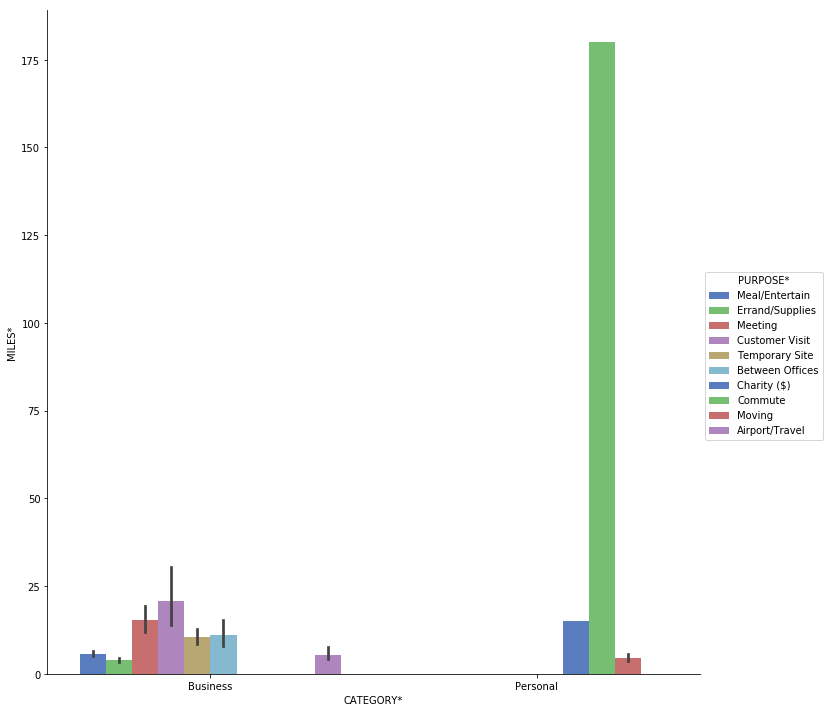

In [187]:
#Question 1
g = sns.factorplot(x="CATEGORY*", y="MILES*", hue="PURPOSE*", data=uber_drives,
                   size=10, kind="bar", palette="muted")
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer; private: commute and charity 

In [190]:
#Question2:
df = uber_drives
df.groupby(['CATEGORY*'])['MILES*'].sum() / df['MILES*'].sum()
#97% of Miles was earned by business trips

CATEGORY*
Business    0.970798
Personal    0.029202
Name: MILES*, dtype: float64

In [191]:
#Question3:
df.groupby(['CATEGORY*', 'PURPOSE*'])['DIFF'].sum()
#the most time spend in the cab for business - meeting/other, personal - commute/other

CATEGORY*  PURPOSE*       
Business   Airport/Travel       78.0
           Between Offices     459.0
           Customer Visit     3375.0
           Errand/Supplies    1661.0
           Meal/Entertain     2580.0
           Meeting            5561.0
           Temporary Site     1293.0
Personal   Charity ($)          27.0
           Commute             185.0
           Moving               60.0
Name: DIFF, dtype: float64